In [1]:
import os
import sys
sys.path.append(r"../")
import numpy as np
import matplotlib.pyplot as plt
# from nodes.HR import HR
from nodes.HH import HH
from connect.ws_small_world import create_sw
from synapse.synapse import synbase
from utils.statistics import cal_cv, cal_synFactor
from utils.utils import spikevent
from utils.utils_plot import plot_firing_raster

In [2]:
seed = 0
np.random.seed(seed)                # 给numpy设置随机种子

# 创建神经元

In [3]:
N = 10
pre = HH(N=N)
post = pre
# post = HH(N=N)
isforward = pre is post

In [4]:
# 初始化神经元
time = []
mem = []
time2 = []
mem2 = []
for i in range(10000):
    if not isforward:
        pre()
    post()
    time.append(pre.t)
    mem.append(pre.mem.copy())
    mem2.append(post.mem.copy())
# mem = np.array(mem)

In [5]:
# mem = np.array(mem)

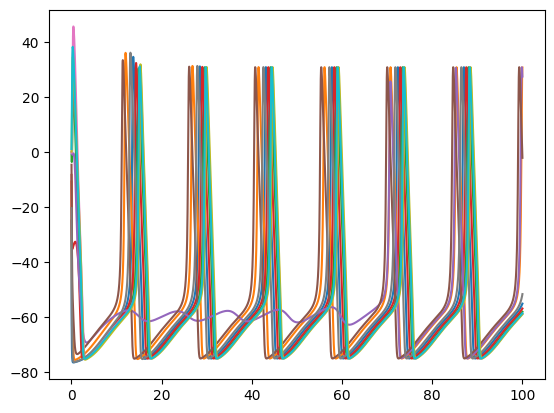

In [6]:
plt.plot(time, mem2)
plt.show()

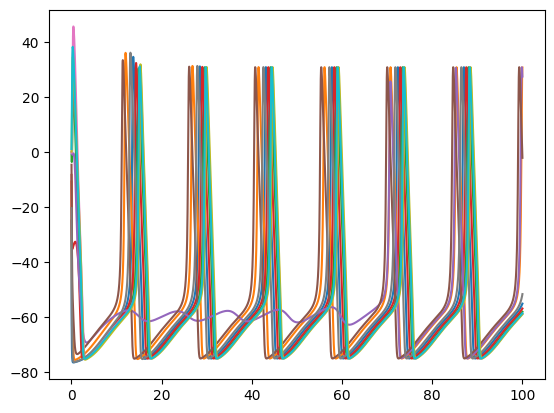

In [7]:
plt.plot(time, mem)
plt.show()

In [8]:
Num = int(N)
conn = create_sw(Num, 2, 0.5)

In [9]:
syn = synbase(pre, post, conn=conn, synType="chem_Alpha")   # ["electr", "chem_Alpha"]
syn.w = .5*np.random.rand(N, N)

In [10]:
time = []
mem = []
mem2 = []
for i in range(10000):
    I_post = syn() 
    if not isforward:
        pre()
    post(I_post)
    
    time.append(syn.t)
    mem.append(syn.post.mem.copy())
    mem2.append(syn.pre.mem.copy())

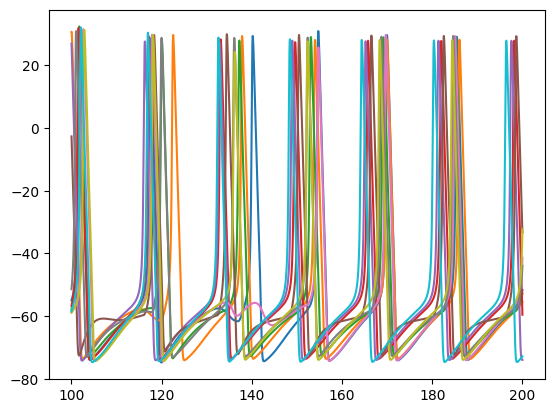

In [11]:
plt.plot(time, mem)
plt.show()

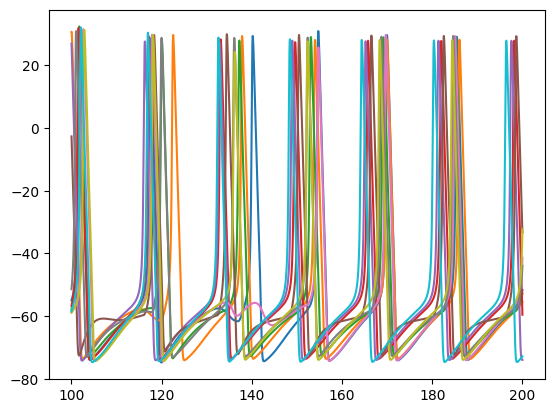

In [12]:
plt.plot(time, mem2)
plt.show()